###                                                                       OPTIMISATION FOR DATA SCIENCE 
####                                                    PREDICTION OF WOMEN'S BEST SELLING CLOTHES BASED ON E-COMMERCE REVIEWS





#### Priyanka Kumar | MSc in Data Science & Analytics (EPITA - 2020)

In [238]:
#Load required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
%matplotlib inline
import math

In [239]:
df = pd.read_csv('Final_datasheet.csv')

In [240]:
df.head(10)

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
5,5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses
6,6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits
7,7,858,39,"Shimmer, surprisingly goes with lots","I ordered this in carbon for store pick up, an...",4,1,4,General Petite,Tops,Knits
8,8,1077,24,Flattering,I love this dress. i usually get an xs but it ...,5,1,0,General,Dresses,Dresses
9,9,1077,34,Such a fun dress!,"I'm 5""5' and 125 lbs. i ordered the s petite t...",5,1,0,General,Dresses,Dresses


In [241]:
X = (df[['Clothing ID','Age','Rating','Recommended IND','Positive Feedback Count']])
X[0:10]


,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
0,767,33,4,1,0
1,1080,34,5,1,4
2,1077,60,3,0,0
3,1049,50,5,1,0
4,847,47,5,1,6
5,1080,49,2,0,4
6,858,39,5,1,1
7,858,39,4,1,4
8,1077,24,5,1,0
9,1077,34,5,1,0


In [242]:
Y = np.array(df[['Recommended IND']])
Y[0:10]

array([[1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1]])

####  Encode the categorical variables

In [243]:
cols = ['Clothing ID','Age','Rating','Recommended IND','Positive Feedback Count']

X_new= df[cols]
X_new.head(10)

,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
0,767,33,4,1,0
1,1080,34,5,1,4
2,1077,60,3,0,0
3,1049,50,5,1,0
4,847,47,5,1,6
5,1080,49,2,0,4
6,858,39,5,1,1
7,858,39,4,1,4
8,1077,24,5,1,0
9,1077,34,5,1,0


#### Normalize the dimension

In [244]:
X_new = X_new[cols].apply( lambda rec:(rec - rec.mean())/rec.std(), axis =0)
X_new['Recommended IND'] = df['Recommended IND']
X_new.head(10)
list(X_new)

['Clothing ID', 'Age', 'Rating', 'Recommended IND', 'Positive Feedback Count']

In [245]:
X_new = np.array(X_new)
X_new[0:9]

array([[-0.74333235, -0.83053118, -0.17660023,  1.        , -0.44472934],
       [ 0.79627203, -0.74909493,  0.72427574,  1.        ,  0.25675411],
       [ 0.78151544,  1.36824761, -1.0774762 ,  0.        , -0.44472934],
       [ 0.64378725,  0.5538851 ,  0.72427574,  1.        , -0.44472934],
       [-0.34982325,  0.30957634,  0.72427574,  1.        ,  0.60749584],
       [ 0.79627203,  0.47244884, -1.97835217,  0.        ,  0.25675411],
       [-0.29571574, -0.34191367,  0.72427574,  1.        , -0.26935848],
       [-0.29571574, -0.34191367, -0.17660023,  1.        ,  0.25675411],
       [ 0.78151544, -1.56345744,  0.72427574,  1.        , -0.44472934]])

#### Randomly Initialise values of beta coefficient values

In [246]:
import random

In [247]:
def init_betas(dim):
    b = random.random()
    w = np.random.rand(dim)
    return b,w 

In [248]:
b,w = init_betas(X_new.shape[1])
print(b,w)

0.11584026639091238 [0.67450643 0.88513504 0.46645355 0.20607013 0.02588022]


#### Define a sigmoid function to predict Y

In [249]:
def sigmoid(b, w ,X_new):
    Z = b + np.matmul(X_new,w)
    return (1.0 / (1 + np.exp(-Z)))  

In [250]:
y_det = sigmoid(b,w,X_new)
y_det[0:5]

array([0.2672755 , 0.63191399, 0.79248321, 0.82817435, 0.67118121])

#### Define a function for calculating binary cross entropy loss function

In [251]:
def cost_fn( y, y_det):
        return - np.sum(np.dot(y.T,np.log(1-y_det)+ np.dot((1-y).T,np.log(1-y_det)))) / ( len(y))

In [252]:
# Reshape the Y
Y=Y.reshape(len(Y), )
current_cost= cost_fn(Y,y_det)
Y.shape

(23486,)

#### Define a function for updating beta values.


In [253]:
def beta_update (b0, w0 , y , y_det, X_new, alpha):
    db = np.sum( y_det - y)/ len(y)
    b0 = b0 - alpha * db
    dw = np.dot((y_det - y), X_new)/ len(y)
    w0 = w0 - alpha * dw
   
   
    return b0,w0
    

In [254]:
alpha = 0.1
type(y_det)

numpy.ndarray

In [255]:
b,w = beta_update (b,w, Y, y_det,X_new, alpha)
w

array([0.66163063, 0.86922555, 0.48614308, 0.23884933, 0.02214759])

### Code for Gradient Descent Iterations

In [256]:
num_iterations = 500
alpha = 0.5

all_costs = []
b,w = init_betas(X_new.shape[1])
print("initial guess of b and w: " , b ,w)

for each_iter in range (num_iterations ):
    y_det = sigmoid(b, w , X_new)
    current_cost = cost_fn (Y, y_det)
    prev_b = b
    prev_w = w
    b, w = beta_update (prev_b, prev_w, Y, y_det, X_new, alpha)
    all_costs.append(current_cost)
    if each_iter % 10 == 0:
        print('Iteration: ', each_iter, 'Cost: ', current_cost)
        each_iter += 1
    
print("Final estimates of b and q are: ", b,w)

initial guess of b and w:  0.49311490559299564 [0.84528763 0.54804433 0.1332512  0.08358989 0.23740978]
Iteration:  0 Cost:  3301.202916524432
Iteration:  10 Cost:  1643.90103811958
Iteration:  20 Cost:  1228.1884945490647
Iteration:  30 Cost:  1037.048301480763
Iteration:  40 Cost:  921.8328801028763
Iteration:  50 Cost:  842.1274410144472
Iteration:  60 Cost:  782.2551699830028
Iteration:  70 Cost:  734.7779861491915
Iteration:  80 Cost:  695.6731280107131
Iteration:  90 Cost:  662.5541660783279
Iteration:  100 Cost:  633.904264381844
Iteration:  110 Cost:  608.7063101913355
Iteration:  120 Cost:  586.248518821882
Iteration:  130 Cost:  566.0151103441927
Iteration:  140 Cost:  547.6213583417727
Iteration:  150 Cost:  530.7732039297078
Iteration:  160 Cost:  515.2411616032308
Iteration:  170 Cost:  500.8428967954545
Iteration:  180 Cost:  487.43125836122795
Iteration:  190 Cost:  474.8858516714754
Iteration:  200 Cost:  463.10697380032536
Iteration:  210 Cost:  452.01116330584125
Iter

In [257]:
from sklearn.linear_model import LogisticRegression

lreg = LogisticRegression()
lmodel = lreg.fit(X_new, Y)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [258]:
lmodel.intercept_

array([-3.56034604])

In [259]:
lmodel.coef_

array([[-0.04637959,  0.03492599,  1.70449578, 11.1739654 , -0.05720112]])

In [260]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

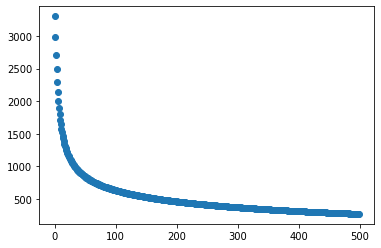

In [261]:
plt.scatter( range(num_iterations), all_costs)
#Plot the cost function for different alpha (learning parameters) values

In [262]:
# For alpha =0.01
num_iterations = 1000
alpha = 0.01

all_costs = []
b,w = init_betas(X_new.shape[1])
print("initial guess of b and w: " , b ,w)

for each_iter in range (num_iterations ):
    y_hat = sigmoid(b, w , X_new)
    current_cost = cost_fn (Y, y_hat)
    prev_b = b
    prev_w = w
    b, w = beta_update (prev_b, prev_w, Y, y_hat, X_new, alpha)
    all_costs.append(current_cost)
    if each_iter % 10 == 0:
        print('Iteration: ', each_iter, ' & Cost: ', current_cost)
        each_iter += 1
    
print("Final estimates of b and w are: ", b,w)

initial guess of b and w:  0.0931268420777771 [0.11222841 0.02146165 0.48349079 0.8536264  0.7379049 ]
Iteration:  0  & Cost:  1773.4487054891629
Iteration:  10  & Cost:  1757.3427022283013
Iteration:  20  & Cost:  1741.5388038878552
Iteration:  30  & Cost:  1726.0283969633829
Iteration:  40  & Cost:  1710.8033511080203
Iteration:  50  & Cost:  1695.8559769514352
Iteration:  60  & Cost:  1681.1789871428314
Iteration:  70  & Cost:  1666.7654606749966
Iteration:  80  & Cost:  1652.6088104341657
Iteration:  90  & Cost:  1638.702753844925
Iteration:  100  & Cost:  1625.0412864307114
Iteration:  110  & Cost:  1611.6186580823853
Iteration:  120  & Cost:  1598.4293518146521
Iteration:  130  & Cost:  1585.4680647875994
Iteration:  140  & Cost:  1572.7296913760047
Iteration:  150  & Cost:  1560.2093080788554
Iteration:  160  & Cost:  1547.9021600747587
Iteration:  170  & Cost:  1535.803649243368
Iteration:  180  & Cost:  1523.909323488464
Iteration:  190  & Cost:  1512.2148672134815
Iteration: 

In [263]:
linReg = LogisticRegression() #Use sklearn logistic regression API and compare the estimation of beta values.
lmodel = linReg.fit(X_new, Y)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [264]:
lmodel.intercept_

array([-3.56034604])

In [265]:
lmodel.coef_

array([[-0.04637959,  0.03492599,  1.70449578, 11.1739654 , -0.05720112]])

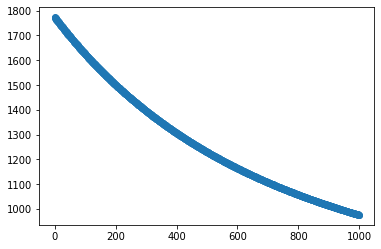

In [266]:
plt.scatter( range(num_iterations), all_costs)

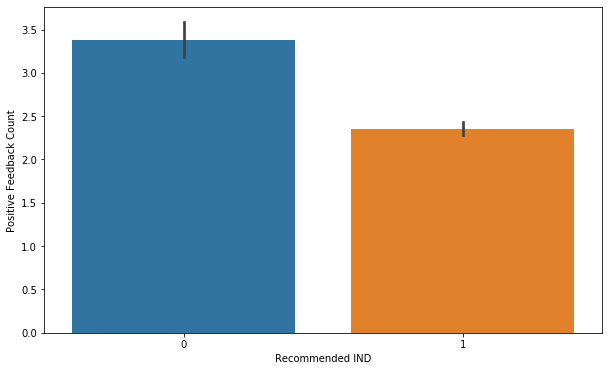

In [281]:
df = (df[['Clothing ID','Age','Rating','Recommended IND','Positive Feedback Count']])
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'Recommended IND', y = 'Positive Feedback Count', data = df)

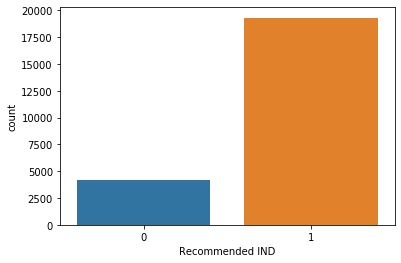

In [268]:
sns.countplot(df['Recommended IND'])

In [269]:
#Now we seperate the dataset as response variable and feature variabes
X = df.drop('Recommended IND', axis = 1)
Y = df['Recommended IND']

In [270]:
#Train and Test splitting of the data 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [271]:
#Applying Standard scaling to get  an optimized result
sc = StandardScaler()

In [272]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
#Our training and testing data is ready now to perform machine learning algorithm

### RANDOM FOREST CLASSIFIER


In [273]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, Y_train)
pred_rfc = rfc.predict(X_test)

In [274]:
#This is how our model is performed now
print(classification_report(Y_test, pred_rfc))


              precision    recall  f1-score   support

           0       0.78      0.80      0.79       851
           1       0.96      0.95      0.95      3847

    accuracy                           0.92      4698
   macro avg       0.87      0.87      0.87      4698
weighted avg       0.92      0.92      0.92      4698



#### The accuracy of Random Forest Classifier model is 92%


In [275]:
#Confusion matrix for random forest classification
print(confusion_matrix(Y_test, pred_rfc))

[[ 680  171]
 [ 191 3656]]


### STOCHASTIC GRADIENT DESCENT CLASSIFIER

In [276]:
sgd = SGDClassifier(penalty=None)
sgd.fit(X_train, Y_train)
predict_sgd = sgd.predict(X_test)

In [277]:
print(classification_report(Y_test, predict_sgd))

              precision    recall  f1-score   support

           0       0.74      0.95      0.83       851
           1       0.99      0.93      0.96      3847

    accuracy                           0.93      4698
   macro avg       0.87      0.94      0.90      4698
weighted avg       0.94      0.93      0.93      4698



#### The accuracy of Stochastic Gradient Descent Classifier model is 93%

### SUPPORT VECTOR CLASSIFIER

In [278]:
svc = SVC()
svc.fit(X_train, Y_train)
predict_svc = svc.predict(X_test)

In [279]:
print(classification_report(Y_test, predict_svc))

              precision    recall  f1-score   support

           0       0.74      0.95      0.83       851
           1       0.99      0.93      0.96      3847

    accuracy                           0.93      4698
   macro avg       0.87      0.94      0.89      4698
weighted avg       0.94      0.93      0.93      4698



#### The accuracy of Support Vector Classifier model is 93%

### CROSS VALIDATION SCORE

In [280]:
#Now lets try to do some evaluation for random forest model using cross validation score.
rfc_eval = cross_val_score(estimator = rfc, X = X_train, y = Y_train, cv = 10)
rfc_eval.mean()

0.928837531828262

#### The accuracy of Random Forest Classifier model has increased from 92% to 93% (slight increase) using cross validation score
